# 11.1 하이퍼파라미터란?

하이퍼파라미터는 모델의 성능에 영향을 끼치지만 자동적으로 최적화 되지 않는 파라미터를 뜻한다.

하이퍼파라미터의 예시 : 학습률, 미니배치, 신경망의 깊이와 넓이 등

# 11.2 팁: 효율적인  연구/개발 진행 방법

### 1. 천 리길도 한 걸음부터

목표를 정복하고 싶으면 베이스캠프를 먼저 세우고 계획되로 되지 않으면 다른 경로를 생각해보거나 왜 실패 했는지 돌이켜볼것

### 2. 하이퍼파라미터에 따른 결과물 정리

필자가 자주 사용한 방법은 파일 이름을 최대한 활용한느 것이었다.  
파일 이름에'.'을 구분자로 활용하여 필드를 나누고 '-' 키를 사용하여 키 값과 밸류를 구분한다.  
model.n_layers-10.n_epochs-100.act-leaky_relu.loss-xxx.accuracy-xx.pth  
또는 시중에 잘 나와있는 도구를 잘 활용하는 것이다.  

### 3. 파이프라인 구축

<img src = "최적화1.jpg" width = "500" height = "500">
반복되는 작업을 최대한 자동화할 수 있도록 파이프라인을 구축함으로써 연구와 실험을 효율적으로 진행할 수 있다.  

따라서 머신러닝 업무를 진행하면서 프로세스를 잘 정리하고 반복되는 작업들이 어떻게 구성되어 있는지 판단해야한다.  
그중에서 자동화가 가능한 부분을 스크립트로 구현하여 파이프라인을 점차 구성해 나간다.  
요즘은 이런 작업을 자동화하기 위한 워크플로 도구들이 많다. (에어플로우, 쿠배플로우)

# 11.3 적응형 학습률

학습률을 대포적인 하이퍼파라미터이다. 가장 먼저 튜닝이 필요한 파라미터이기도 하다.

### 1. 학습률 크기에 따른 특성과 동적 학습률의 필요성

학습률 감쇠 비율 : 초반에 큰 학습률을 가져가되 현제 에포크의 손실 값이 지난 과거 에포크 손실 값보다 나아지지 않을 경우, 학습률을 일정 비율로 줄이는 방법. 보통 0.5 또는 0.1의 값을 활용한다.  

이처럼 학습률을 학습 내내 고정하는 것이 아니라 동적으로 가져간다면 이점이 있다.  
다음은 적응형 학습률의 주요 계보이다.  
<img src = "최적화2.jpg" width = "400" height = "400">
다양한 적응형 학습률에 대한 알고리즘이 존재하는데, 대표적인 알고리즘은 아담(Adam)이다.

### 2. 모멘텀

모멘텀은 딥러닝 이전부터 활용되어 온 최적화 기법이다.  
지역최소점을 쉽게 탈출할 수 있을 뿐만 아니라 학습속도를 가속화 할 수 있다.  
모멘텀은 시작부터 매번 계산된 그래디언트를 누적하는 형태로 구현된다.  
<img src = "최적화3.jpg" width = "400" height = "400">
골짜기 가운데 어떤 지점이 전역최소점이 될 것이다.  
가로 방향의 기울기는 세로 방향의 기울기에 비해서 훨씬 덜 가파르다.  
따라서 그림과 같은 시작 지점에서는 세로방향의 기울기가 훨씬 강하기 때문에 오른쪽으로 가는 와중에도 위아래 진동이 매우 심하다.  
이것은 검은색 화살표 점선으로 표현되어 있다.  
즉, 오른쪽으로 가야하는 간단한 문제인데 위아래 왔다갔다 하느라 최적화가 더뎌짐.

이때 모멘텀을 적용한다면 위아래로 진동하는 방향이 서로 상쇄되어 작아지고, 오른쪽으로 나아가는 방향은 누적되어 커진다.  
이것은 빨간색 화살표 점선으로 표현되어 있다.

### 3. 적응형 학습률

모멘텀의 경우 학습률의 크기에 따라서 최적화 여부가 좌지우지될 수 있다.  

새로운 데이터셋과 새로운 모델 구조를 가지고 학습을 시작할 때 학습률에 대한 고민을 하지 않고 기본 설정값을 사용하더라도 학습이 잘 되었으면 하는 목적을 가지게 되었다.  
상황에 따라 학습률이 자동으로 정해지는 형태가 될 것이고 이것을 "적응형 학습률"이라고 부른다.

#### 학습률 스케줄링

학습 초반은 학습률을 크게 가져가면 좋고 학습 후반에 갈수록 미세한 가중치 파라미터 조정이 필요할 수 있기 때문에 학습률이 더 작아지면 좋을 것이다.  
하지만 작은 학습률을 갖고 시작하면 학습 초반에 더딘 진행에 답답하고, 큰 학습률을 갖고 시작하면 학습 후반에 미세한 파라미터 조정이 어려워질 수 있다.  
따라서 이런 이유로 학습률 스케줄링 기법이 활용되기도 한다.
* 초기 학습률을 가지고 모델 최적화를 수행한다.
* 일정 에포크 또는 이터레이션이 경과한 후에 감쇠(decay)를 시작한다. 또는 해당 에포크에서 모델의 학습이 더이상 진전되지 않을 때 감쇠하기도 한다.
* 학습률 감쇠는 선형적으로 적용될 수 있으며, 비율이 곱해지는 형태로 적용되거나 코사인 함수의 형태로 적용될 수 있다.
* 감쇠되는 형태 또는 비율 또한 하이퍼파라미터 이다.

#### 아다그래드 옵티마이저
아다그래드의 가장 큰 특징은 가중치 파라미터마다 별도의 학습률을 가진다는 것이다.  
각 가중치 파라미터의 학습률은 가중치 파라미터가 업데이트될수록 반비례하여 작아지게 된다.  
문제는 학습이 진행됨에 따라 파라미터 업데이트가 많이 될 경우 학습률이 너무 작아져 나중에는 그레디언트가 크더라도 가중치 파라미터 업데이트가 잘 이루어지지 않을 수도 있다.

#### 아담 옵티마이저
아담은 기존 적응형 학습률 방식에 모멘텀이 추가된 알고리즘으로 기존 알고리즘을 보완함으로써 가장 보편적으로 쓰이는 알고리즘이다.  
아담 옵티마이저를 사용하면 기본 설정값을 가지고도 대부분의 문제에서 좋은 성능을 얻을 수 있다.  

# 11.4 적응형 학습률의 수식

그동안 활용해온 최적화 방법을 수식으로 나타내면 다음과 같다.
<img src = "최적화4.jpg" width = "400" height = "400">
손실 함수는 데이터셋의 샘플들에 대해 타깃 출력값과 함수의 출력값 사이의 차이를 계산한다.  
이것을 가중치 파라미터에 대해서 미분하면 그래디언트 벡터 g를 얻을 수 있다.  
앞서 구한 그래디언트에 학습률을 곱해 기존 파라미터에서 빼 준 결과를 다음 파라미터로 정한다.  
여기서 t는 파라미터 업데이트 횟수를 뜻한다. 즉, 이터레이션을 의미하지 에포크가 아니다.

<img src = "최적화5.jpg" width = "400" height = "400">

### 1. 모멘텀의 수식
다음 수식을 보면 모멘텀은 예전 그래디언트를 누적해서 계산하는 것을 볼 수 있다.
<img src = "최적화6.jpg" width = "400" height = "400">
이 수식을 통해 그래디언트를 재정의 하는데 이전까지의 모멘텀 그래디언트와 현재 그래디언트의 선형 결합을 계산한다.  
다르게 표현하면 처음부터 현재까지의 디스카운트 파라미터가 곱해진 그래디언트의 누적 합이 된다.

그러고 나면 다음 가중치 파라미터를 업데이트 하기 위해 현재 가중치 파라미터에 모멘텀 그래디언트를 더해준다.
<img src = "최적화7.jpg" width = "400" height = "400">

여전히 수식에 학습률 n가 남아있는 것을 볼 수 있고 결국 누적된 그래디언트가 파라미터 업데이트에 끼치는 영향도를 설정하고 있음을 알 수 있다.

### 2. 아다그래드의 수식

<img src = "최적화8.jpg" width = "400" height = "400">
학습 초반에는 큰 학습률을 통해 빠르게 학습되도록 하고 학습 후반에는 작은 학습률을 통해 파라미터를 미세하게 조정할 수 있도록 한다.  
먼저 아다그래드는 각 가중치 파라미터 별로 학습률이 따로 정해지는 것을 기본으로 한다.  
여기에 수식과 같이 그래디언트의 제곱을 누적한 값을 계산하여 활용할 것이다.

r은 t까지의 그래디언트 제곱 값을 누적한 값이다.
<img src = "최적화9.jpg" width = "400" height = "400">

누적값 r과 그래디언트 g는 같은 크기를 지닌 벡터 또는 행렬이 될 것이기 때문에 r가 각 가중치 파라미터별 학습률이 됨을 확인할 수 있다.  
이로 인해 그동안 업데이트의 크기가 큰 가중치 파라미터 요소는 작은 학습률이 곱해질 것이다.

이처럼 적응형 학습률을 사용하게 되면 학습 초기에는 큰 학습률과 학습 후기에는 작은 학습률을 가질 수 있게 된다.  
하지만 앞의 수식에서도 볼 수 있듯이 아다그래드의 경우에는 후반부에 갈수록 0에 가까운 학습률이 되어 그래디언트 g가 충분히 큰 상황이더라도 학습이 진전되지 못할 수 있다.

### 3. 아담의 수식

아담의 경우, 기존 적응형 학습률 방식에 모멘텀이 추가된 것이 가장 큰 특징이다.  
하이퍼파라미터도 2개가 추가되는데, 다음과 같은 기본 설정값을 지니고 있다.
p1 = 0.9  p2 = 0.999.

아담에서 모멘텀 역할을 하는 수식의 경우는 기존 모멘텀에는 현재 그래디언트에 학습률이 바로 곱해졌지만, 여기에서는 1-p1이 대신 곱해지고 있는 것을 볼 수 있다.
<img src = "최적화10.jpg" width = "400" height = "400">

앞의 수식에서 본 것처럼 처음부터 그래디언트가 누적된 모멘텀의 텀(term)을 s라고 부르겠다.  
여기에 적응형 학습률을 다음 수식과 같이 정의하고 r이라고 부르겠다.
<img src = "최적화11.jpg" width = "400" height = "400">

기존의 아다그래드와 이 적응형 학습률 수식의 가장 큰 차이점은 디스카운트 파라미터의 존재 유무이다.  
앞서 소개한 하이퍼파라미터 p2가 반복되어 곱해짐으로써 학습 후반으로 갈수록 그래디언트 제곱 값의 누적이 마냥 커지기만 하는 것을 방지할 수 있다.

다음 수식과 같이 모멘텀 s와 적응형 학습률 r을 재정의 한다.  
<img src = "최적화12.jpg" width = "400" height = "400">

이렇게 재정의된 수식들을 전체 경사하강법 수식에 넣어 전개하면 다음과 같다.
<img src = "최적화13.jpg" width = "400" height = "400">

이처럼 수식을 가중치 파라미터 theta와 하이퍼파라미터 n(학습률), p1, p2 그리고 그래디언트 g로 온전히 나타낼 수 있다.
<img src = "최적화14.jpg" width = "400" height = "400">

수식에서 (2)번의 경우에는 하이퍼파라미터들로만 구성되어 있으므로 맨 앞의 학습률 파라미터와 함께 단순히 상수 취급 가능하다.  
(3)번의 경우에는 모멘텀, (4)번의 경우에는 적응형 학습률에 대응되는 부분으로 볼 수 있다.  
(1)번의 경우, 학습이 진행되며 t가 증가함에 따라 다음과 같은 값이 된다.  
<img src = "최적화15.jpg" width = "400" height = "400">

# 11.5 아담 옵티마이저 적용하기

### 1. 데이터 준비

기존 캘리포니어 주택 데이터셋에서 SGD를 아담으로 교체한느 방법이다.  
옵티마이저를 선언하는 부분만 바뀌게 된다.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

필요한 패키지들과 데이터셋을 불러오고 판다스에서 읽어들여 Target이라는 이름을 갖는 열에 출력 데이터를 넣어준다.

In [2]:
california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)
df["Target"] = california.target
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


앞에서와 마찬가지로 표준 스케일링을 적용하여 입력 데이터를 정규화 한다.

In [5]:
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:,:-1] = scaler.transform(df.values[:, :-1])

df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.781
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.771
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.923
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.847
20639,-0.780129,-1.004309,-0.070443,0.138403,-0.033977,-0.043682,1.750146,-0.833696,0.894


### 2. 학습 코드 구현

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

그리고 넘파이로 되어있는 데이터셋을 파이토치로 변환한다.

In [8]:
data = torch.from_numpy(df.values).float()

x = data[:, :-1]
y= data[:, -1:]

print(x.shape, y.shape)

torch.Size([20640, 8]) torch.Size([20640, 1])


입력 데이터와 출력 데이터에 해당하는 열을 각각 슬라이싱하여 변수 x와 y에 집어넣고 크기를 출력한다.  
다음 출력 결과에서 알 수 있듯이, 20640개의 입출력 쌍 샘플들이 줄었다.  
입력 샘플은 8차원 벡터로 이루어지며 출력샘플은 스칼라값으로 되어있다.

이제부터는 학습률이 필요 없게 되었다.  

In [9]:
n_epochs = 4000
batch_size = 256
print_interval = 200
#learning_rate = 1e-2

그리고 nn.Sequential을 활용하여 똑같이 모델을 만듭니다.

In [10]:
model = nn.Sequential(
    nn.Linear(x.size(-1), 6),
    nn.LeakyReLU(),
    nn.Linear(6,5),
    nn.LeakyReLU(),
    nn.Linear(5,4),
    nn.LeakyReLU(),
    nn.Linear(4,3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1)),
)

만든 모델을 옵티마이저에 등록한다.  
앞에서는 optim.SGD 클래스를 통해서 모델을 학습하기 위한 옵티마이저 객체를 생성했다.  
이번에는 optim.Adam 클래스를 통해 아담 옵티마이저를 선언한다.  
이때 모델 파라미터만 등록하되 학습률은 인자로 넣어주지 않는다.

In [11]:
# We don't need learning rate hyper-parameter.
optimizer = optim.Adam(model.parameters())

In [12]:
# |x| = (total_size, input_dim)
# |y| = (total_size, output_dim)

for i in range(n_epochs):
    # Shuffle the index to feed-forward.
    indices = torch.randperm(x.size(0))
    x_ = torch.index_select(x, dim=0, index=indices)
    y_ = torch.index_select(y, dim=0, index=indices)
    
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)
    # |x_[i]| = (batch_size, input_dim)
    # |y_[i]| = (batch_size, output_dim)
    
    y_hat = []
    total_loss = 0
    
    for x_i, y_i in zip(x_,y_):
        # |x_i| = |x_[i]|
        # |y_i| = y_[i]|
        y_hat_i = model(x_i)
        loss = F.mse_loss(y_hat_i, y_i)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        total_loss += float(loss) # This is very important to prevent memory leak.
        
        y_hat += [y_hat_i]
        
        
    total_loss = total_loss / len(x_)
    if(i + 1) % print_interval == 0:
        print("Epoch %d: loss=%.4e" % (i + 1, total_loss))
        
y_hat = torch.cat(y_hat, dim=0)
y = torch.cat(y_, dim=0)
# |y_hat| = (total_size, output_dim)
# |y| = (total_size, output_dim)

Epoch 200: loss=3.0887e-01
Epoch 400: loss=2.9169e-01
Epoch 600: loss=2.8720e-01
Epoch 800: loss=2.8628e-01
Epoch 1000: loss=2.8545e-01
Epoch 1200: loss=2.8510e-01
Epoch 1400: loss=2.8482e-01
Epoch 1600: loss=2.8398e-01
Epoch 1800: loss=2.8518e-01
Epoch 2000: loss=2.8394e-01
Epoch 2200: loss=2.8418e-01
Epoch 2400: loss=2.8428e-01
Epoch 2600: loss=2.8311e-01
Epoch 2800: loss=2.8318e-01
Epoch 3000: loss=2.8347e-01
Epoch 3200: loss=2.8411e-01
Epoch 3400: loss=2.8402e-01
Epoch 3600: loss=2.8307e-01
Epoch 3800: loss=2.8337e-01
Epoch 4000: loss=2.8328e-01


###  3. 결과 확인

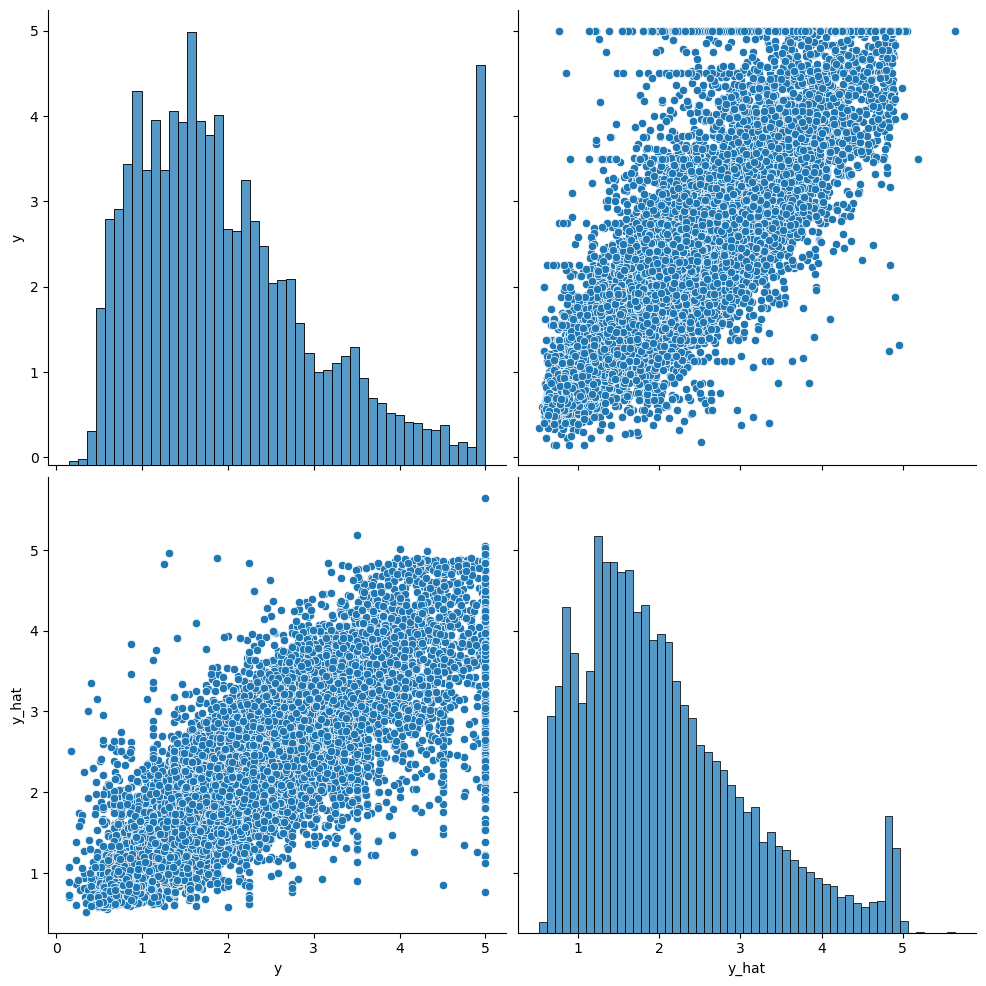

In [13]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()